## Using Advanced Optimization Algorithm


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.optimize import minimize
%matplotlib inline

data = np.loadtxt('./Files/ex2data1.txt',delimiter=",")

X = data[:,0:2] #Matrix to store the marks
Y = (data[:,2]).reshape(100,1)   #Matrix to show the admission status

m = Y.size       #No of training samples
n = X.shape[1]   #No of Features

#### Visualizing the data

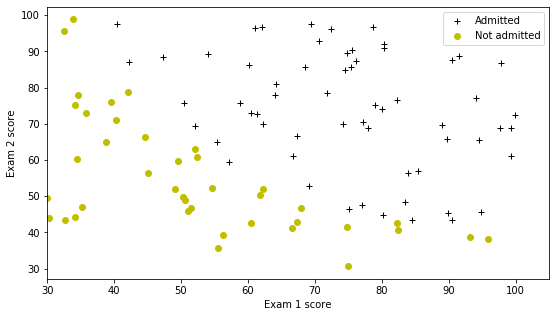

In [2]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])

def PlotD():
    plt.figure(figsize=(9,5))    
    plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(loc='upper right')
    plt.xlim((30,105))

PlotD()

In [3]:
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1) 

In [4]:
def SigmoidFn(Z):
    G = scipy.special.expit(Z)
    return G

In [5]:
def CostFn(Theta,x,y):
    h = SigmoidFn(np.dot(x,Theta))
    J = (-1/m)*np.sum((y.reshape(100,1).T).dot(np.log(h))+(1-y.reshape(100,1)).T.dot(np.log(1-h)))
    return J 

In [6]:
def grad(Theta,x,y):
    h = SigmoidFn(np.dot(x,Theta.reshape(3,1)))
    gradient = (1/m)*((x.T).dot(h-y.reshape(100,1)))
    return(gradient.flatten())

In [7]:
theta = np.zeros((3,))
cost = CostFn(theta,X,Y)
gradient = grad(theta,X,Y)

print("Initial Cost:",cost)
print("Initial Gradient:",gradient)

Initial Cost: 0.6931471805599452
Initial Gradient: [ -0.1        -12.00921659 -11.26284221]


### Note
scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None,options=None)

fun: The objective function to be minimized.
 
    fun(x, *args) -> float

where x is an 1-D array with shape (n,) and args is a tuple of the fixed parameters.

x0: ndarray, shape (n,)

args: tuple, optional, Extra arguments passed to the objective function and its derivatives (fun, jac and hess functions).

method: str or callable, optional,Type of solver. eg‘Nelder-Mead’,‘BFGS’,‘Newton-CG’‘L-BFGS-B ,etc

In [8]:
val = minimize(CostFn, theta, args=(X,Y.flatten()), method=None, jac=grad, options={'maxiter':400})
val

/home/lord_grim/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


      fun: 0.20349770158944375
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476813e-09, -9.31921313e-07, -2.82608924e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [9]:
print("Optimized Theta:",val.x)

Optimized Theta: [-25.16133284   0.2062317    0.2014716 ]


#### Visualizing the Dicision boundary
Using .5 on the probability scale corresponds to using 0 on the log odds (linear) scale. If we only want to know the set of all points in the X1, X2 space that correspond to a predicted log odds of 0, we can set the fitted model equal to 0 and then algebraically rearrange the equation to make one variable a function of the other. Once you have that, you can plot the decision boundary on the X1, X2 (height,weight) plane.

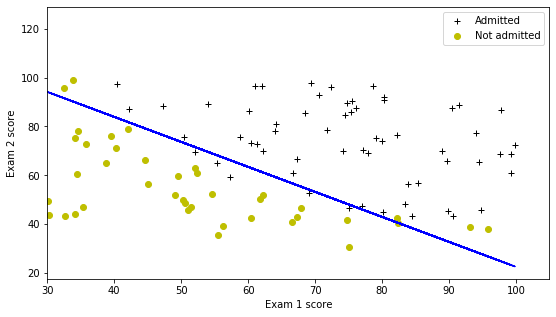

In [10]:
h = (-1./val.x[2])*(val.x[0] + val.x[1]*X)
PlotD()
plt.plot(X,h,'b',label="Dicision Boundary")
plt.show()